<a href="https://colab.research.google.com/github/aritsarann/data-python-nd/blob/main/dads/ml/ML2_6610412001_stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries and Data

In [229]:
url = 'https://anaconda.org/conda-forge/libta-lib/0.4.0/download/linux-64/libta-lib-0.4.0-h166bdaf_1.tar.bz2'
!curl -L $url | tar xj -C /usr/lib/x86_64-linux-gnu/ lib --strip-components=1
url = 'https://anaconda.org/conda-forge/ta-lib/0.4.19/download/linux-64/ta-lib-0.4.19-py310hde88566_4.tar.bz2'
!curl -L $url | tar xj -C /usr/local/lib/python3.10/dist-packages/ lib/python3.10/site-packages/talib --strip-components=3

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4400    0  4400    0     0  19786      0 --:--:-- --:--:-- --:--:-- 19819
100  517k  100  517k    0     0   997k      0 --:--:-- --:--:-- --:--:--  997k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4444    0  4444    0     0  19709      0 --:--:-- --:--:-- --:--:-- 19751
100  392k  100  392k    0     0   807k      0 --:--:-- --:--:-- --:--:--  807k


In [230]:
# Data Manipulation
import numpy as np
import pandas as pd
import yfinance as yf
import talib as ta

# Plotting graphs
import matplotlib.pyplot as plt

# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [231]:
# Import Data
import yfinance as yf
data = yf.download('NFLX', '2023-12-01','2024-02-02', interval='1h')

[*********************100%%**********************]  1 of 1 completed


In [232]:
df = data.copy()
df.head()

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-12-01 09:30:00-05:00,472.660004,475.229889,469.769989,471.200012,471.200012,645853
2023-12-01 10:30:00-05:00,471.239990,471.989990,468.071991,469.850006,469.850006,493975
2023-12-01 11:30:00-05:00,469.880005,470.939911,467.720001,470.220001,470.220001,483041
2023-12-01 12:30:00-05:00,470.200012,470.359985,468.890015,468.950012,468.950012,319099
2023-12-01 13:30:00-05:00,468.989990,469.179993,464.600006,466.190002,466.190002,652158


In [233]:
df[df.isnull().any(axis=1)]

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,


## Define Variables

In [234]:
df['S_10'] = df['Close'].rolling(window=10).mean()
df['Corr'] = df['Close'].rolling(window=10).corr(df['S_10'])
df['RSI'] = ta.RSI(np.array(df['Close']), timeperiod =10)
df['Open-Close'] = df['Open'] - df['Close'].shift(1)
df['Open-Open'] = df['Open'] - df['Open'].shift(1)
df = df.dropna()

In [235]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,S_10,Corr,RSI,Open-Close,Open-Open
Datetime,,,,,,,,,,,
2023-12-05 13:30:00-05:00,452.070007,454.109894,451.670013,453.910004,453.910004,232094,453.343002,0.671916,31.206335,0.010010,0.420013
2023-12-05 14:30:00-05:00,453.820007,455.554993,452.888092,455.380005,455.380005,295148,453.236502,0.135860,36.925887,-0.089996,1.750000
2023-12-05 15:30:00-05:00,455.399994,455.519989,454.230011,455.290009,455.290009,375101,453.394504,-0.066623,36.718223,0.019989,1.579987
2023-12-06 09:30:00-05:00,460.000000,460.500000,454.045013,455.019989,455.019989,609987,453.500504,-0.276874,36.042496,4.709991,4.600006
2023-12-06 10:30:00-05:00,455.040009,455.779999,450.170013,450.170013,450.170013,585819,453.324506,0.107772,26.360817,0.020020,-4.959991


In [236]:
X = df.iloc[:,:9]
y = np.where(df['Close'].shift(-1) > df['Close'],1,-1)
X.head()

,Open,High,Low,Close,Adj Close,Volume,S_10,Corr,RSI
Datetime,,,,,,,,,
2023-12-05 13:30:00-05:00,452.070007,454.109894,451.670013,453.910004,453.910004,232094,453.343002,0.671916,31.206335
2023-12-05 14:30:00-05:00,453.820007,455.554993,452.888092,455.380005,455.380005,295148,453.236502,0.135860,36.925887
2023-12-05 15:30:00-05:00,455.399994,455.519989,454.230011,455.290009,455.290009,375101,453.394504,-0.066623,36.718223
2023-12-06 09:30:00-05:00,460.000000,460.500000,454.045013,455.019989,455.019989,609987,453.500504,-0.276874,36.042496
2023-12-06 10:30:00-05:00,455.040009,455.779999,450.170013,450.170013,450.170013,585819,453.324506,0.107772,26.360817


## Model Train

In [237]:
# Split the data into training and testing sets
split = int(0.7*len(df))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

print('X_train size:',X_train.shape)
print('y_train size:',y_train.shape)
print('X_test size:',X_test.shape)
print('y_test size:',y_test.shape)

X_train size: (193, 9)
y_train size: (193,)
X_test size: (83, 9)
y_test size: (83,)


In [238]:
# Instantiate the logistic regression
model = LogisticRegression()
model = model.fit (X_train,y_train)

In [239]:
# Examine The Coefficients
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

,0,1
0,Open,[7.828605644674316e-05]
1,High,[7.791851755723506e-05]
2,Low,[7.775345094166697e-05]
3,Close,[7.767327083319463e-05]
4,Adj Close,[7.767327083319463e-05]
5,Volume,[-1.8138056362719931e-07]
6,S_10,[7.936883531856051e-05]
7,Corr,[-4.150080177121585e-08]
8,RSI,[5.023893592388842e-06]


In [240]:
# Calculate Class Probabilities : Specify the date for prediction
prediction_date = '2023-12-05'
probability = model.predict_proba(X_test)
print(probability)

[[0.47879467 0.52120533]
 [0.46549065 0.53450935]
 [0.45790245 0.54209755]
 [0.46328037 0.53671963]
 [0.46998775 0.53001225]
 [0.4728618  0.5271382 ]
 [0.49276595 0.50723405]
 [0.47166836 0.52833164]
 [0.46125954 0.53874046]
 [0.45955454 0.54044546]
 [0.45997597 0.54002403]
 [0.45906747 0.54093253]
 [0.46335006 0.53664994]
 [0.50465962 0.49534038]
 [0.46599332 0.53400668]
 [0.4628451  0.5371549 ]
 [0.46156961 0.53843039]
 [0.47627522 0.52372478]
 [0.46966986 0.53033014]
 [0.47455816 0.52544184]
 [0.51678321 0.48321679]
 [0.47522165 0.52477835]
 [0.46093503 0.53906497]
 [0.4560873  0.5439127 ]
 [0.45994089 0.54005911]
 [0.45846416 0.54153584]
 [0.46558297 0.53441703]
 [0.55450132 0.44549868]
 [0.52325209 0.47674791]
 [0.48694821 0.51305179]
 [0.48889527 0.51110473]
 [0.48675123 0.51324877]
 [0.5171285  0.4828715 ]
 [0.52830756 0.47169244]
 [0.89388534 0.10611466]
 [0.60171288 0.39828712]
 [0.56422302 0.43577698]
 [0.49999357 0.50000643]
 [0.49474326 0.50525674]
 [0.50330065 0.49669935]


In [241]:
# Predict Class Labels
predicted = model.predict(X_test)

In [242]:
print(predicted)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1 -1  1  1  1
  1  1  1 -1 -1  1  1  1 -1 -1 -1 -1 -1  1  1 -1 -1 -1  1  1  1  1  1 -1
 -1 -1 -1  1  1  1 -1 -1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1]


In [243]:
# Find the dates with predicted buy signals (Signal = 1)
buy_signal_dates =  X_test.index[predicted == 1]

# Print the date(s) with buy signal(s)
print("\nDate(s) with Buy Signal(s):")
print(buy_signal_dates)


Date(s) with Buy Signal(s):
DatetimeIndex(['2024-01-17 10:30:00-05:00', '2024-01-17 11:30:00-05:00',
               '2024-01-17 12:30:00-05:00', '2024-01-17 13:30:00-05:00',
               '2024-01-17 14:30:00-05:00', '2024-01-17 15:30:00-05:00',
               '2024-01-18 09:30:00-05:00', '2024-01-18 10:30:00-05:00',
               '2024-01-18 11:30:00-05:00', '2024-01-18 12:30:00-05:00',
               '2024-01-18 13:30:00-05:00', '2024-01-18 14:30:00-05:00',
               '2024-01-18 15:30:00-05:00', '2024-01-19 10:30:00-05:00',
               '2024-01-19 11:30:00-05:00', '2024-01-19 12:30:00-05:00',
               '2024-01-19 13:30:00-05:00', '2024-01-19 14:30:00-05:00',
               '2024-01-19 15:30:00-05:00', '2024-01-22 10:30:00-05:00',
               '2024-01-22 11:30:00-05:00', '2024-01-22 12:30:00-05:00',
               '2024-01-22 13:30:00-05:00', '2024-01-22 14:30:00-05:00',
               '2024-01-22 15:30:00-05:00', '2024-01-23 11:30:00-05:00',
               '2024-0

## Evaluate Model

In [244]:
## Confusion Matrix - describe the performance
print(metrics.confusion_matrix(y_test, predicted))

[[ 9 28]
 [10 36]]


In [245]:
## Classification Report - examine the performance
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

          -1       0.47      0.24      0.32        37
           1       0.56      0.78      0.65        46

    accuracy                           0.54        83
   macro avg       0.52      0.51      0.49        83
weighted avg       0.52      0.54      0.51        83



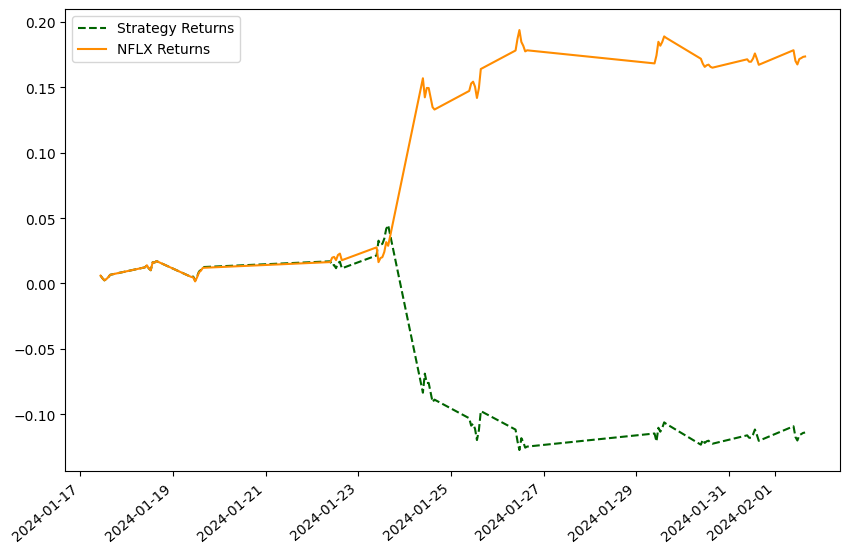

In [246]:
## Create Trading Strategy Using The Model

df['Predicted_Signal'] = model.predict(X)
df['NFLX_returns'] = np.log(df['Close']/df['Close'].shift(1))
Cumulative_NFLX_returns = np.cumsum(df[split:]['NFLX_returns'])

df['Strategy_returns'] = df['NFLX_returns']* df['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = np.cumsum(df[split:]['Strategy_returns'])

plt.figure(figsize=(10,6))
plt.plot(Cumulative_Strategy_returns, color='darkgreen', linestyle='--', label = 'Strategy Returns')
plt.plot(Cumulative_NFLX_returns, color='darkorange', label = 'NFLX Returns')
plt.xticks(rotation=40, ha='right')
plt.legend()
plt.show()

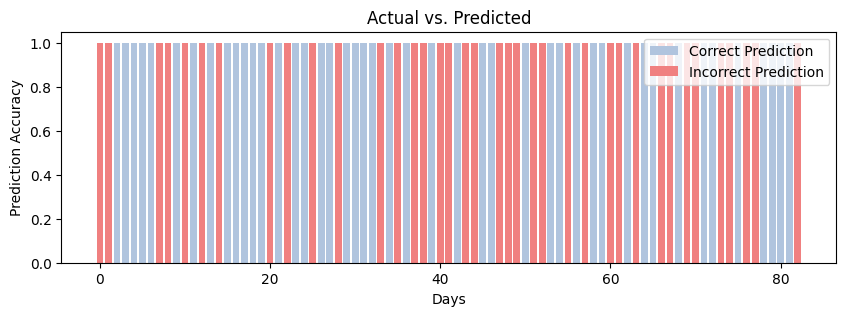

In [247]:
correct_predictions = (y_test == predicted)

# Plot actual vs. predicted values
plt.figure(figsize=(10, 3))
plt.bar(np.arange(len(y_test)), correct_predictions, color='lightsteelblue', label='Correct Prediction')
plt.bar(np.arange(len(y_test)), ~correct_predictions, color='lightcoral', label='Incorrect Prediction')
plt.title('Actual vs. Predicted')
plt.xlabel('Days')
plt.ylabel('Prediction Accuracy')
plt.legend()
plt.show()

## Add Feature

In [248]:
a_data = yf.download('AMZN', '2023-12-01','2024-02-02', interval='1h')
a_data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-12-01 09:30:00-05:00,146.000000,146.899994,145.550003,146.139999,146.139999,8143028
2023-12-01 10:30:00-05:00,146.119995,146.699997,145.699997,146.610001,146.610001,5681087
2023-12-01 11:30:00-05:00,146.610001,146.865005,146.229996,146.789993,146.789993,4132861
2023-12-01 12:30:00-05:00,146.787796,147.100006,146.559998,146.570007,146.570007,3671701
2023-12-01 13:30:00-05:00,146.570007,146.929993,146.229996,146.860001,146.860001,3190377


In [249]:
df2 = data.copy()
df2['AMZN_c'] = a_data.Close
df2.head()

,Open,High,Low,Close,Adj Close,Volume,AMZN_c
Datetime,,,,,,,
2023-12-01 09:30:00-05:00,472.660004,475.229889,469.769989,471.200012,471.200012,645853,146.139999
2023-12-01 10:30:00-05:00,471.239990,471.989990,468.071991,469.850006,469.850006,493975,146.610001
2023-12-01 11:30:00-05:00,469.880005,470.939911,467.720001,470.220001,470.220001,483041,146.789993
2023-12-01 12:30:00-05:00,470.200012,470.359985,468.890015,468.950012,468.950012,319099,146.570007
2023-12-01 13:30:00-05:00,468.989990,469.179993,464.600006,466.190002,466.190002,652158,146.860001


In [250]:
df2[df2.isnull().any(axis=1)]

,Open,High,Low,Close,Adj Close,Volume,AMZN_c
Datetime,,,,,,,


In [251]:
df2['S_10'] = df2['Close'].rolling(window=10).mean()
df2['Corr'] = df2['Close'].rolling(window=10).corr(df['S_10'])
df2['RSI'] = ta.RSI(np.array(df2['Close']), timeperiod =10)
df2['Open-Close'] = df2['Open'] - df2['Close'].shift(1)
df2['Open-Open'] = df2['Open'] - df2['Open'].shift(1)
df2 = df2.dropna()

In [252]:
X2 = df2.iloc[:,:10]
y2 = np.where(df2['Close'].shift(-1) > df2['Close'],1,-1)
X2.head()

,Open,High,Low,Close,Adj Close,Volume,AMZN_c,S_10,Corr,RSI
Datetime,,,,,,,,,,
2023-12-06 15:30:00-05:00,447.679993,448.410004,445.730011,446.729004,446.729004,612976,144.520004,451.481403,0.860750,20.848893
2023-12-07 09:30:00-05:00,450.850006,452.489990,448.320007,450.850006,450.850006,692395,146.850006,451.175403,0.698176,40.205794
2023-12-07 10:30:00-05:00,450.880005,451.910004,449.570007,450.459991,450.459991,511837,146.910004,450.683401,0.560107,39.197759
2023-12-07 11:30:00-05:00,450.399994,452.000000,450.380005,451.640015,451.640015,314348,147.255005,450.318402,0.253631,43.924153
2023-12-07 12:30:00-05:00,451.779907,451.779907,450.450012,450.695007,450.695007,233369,147.389999,449.885904,-0.242379,41.082510


In [253]:
# Split the data into training and testing sets
split = int(0.7*len(df2))
X2_train, X2_test, y2_train, y2_test = X2[:split], X2[split:], y2[:split], y2[split:]

print('X2_train size:',X2_train.shape)
print('y2_train size:',y2_train.shape)
print('X2_test size:',X2_test.shape)
print('y2_test size:',y2_test.shape)

X2_train size: (186, 10)
y2_train size: (186,)
X2_test size: (81, 10)
y2_test size: (81,)


In [254]:
# Instantiate the logistic regression
model2 = LogisticRegression()
model2 = model2.fit (X2_train,y2_train)

In [255]:
# Examine The Coefficients
pd.DataFrame(zip(X2.columns, np.transpose(model2.coef_)))

,0,1
0,Open,[8.633826504835396e-05]
1,High,[8.582994393721104e-05]
2,Low,[8.553848720631597e-05]
3,Close,[8.537774111300253e-05]
4,Adj Close,[8.537774111300253e-05]
5,Volume,[-2.0609172556472226e-07]
6,AMZN_c,[2.6965869114767846e-05]
7,S_10,[8.697028155370185e-05]
8,Corr,[-7.378979454384327e-08]
9,RSI,[5.330044231983091e-06]


In [256]:
# Calculate Class Probabilities : Specify the date for prediction
prediction_date = '2023-12-05'
probability2 = model2.predict_proba(X2_test)
print(probability2)

[[0.45322529 0.54677471]
 [0.45932526 0.54067474]
 [0.46694031 0.53305969]
 [0.47020215 0.52979785]
 [0.49281303 0.50718697]
 [0.46884833 0.53115167]
 [0.45703525 0.54296475]
 [0.4551002  0.5448998 ]
 [0.45557974 0.54442026]
 [0.45455127 0.54544873]
 [0.45941287 0.54058713]
 [0.50632231 0.49367769]
 [0.46238997 0.53761003]
 [0.45880959 0.54119041]
 [0.45736006 0.54263994]
 [0.47405897 0.52594103]
 [0.4665586  0.5334414 ]
 [0.47211512 0.52788488]
 [0.52010108 0.47989892]
 [0.47288359 0.52711641]
 [0.4566672  0.5433328 ]
 [0.45116956 0.54883044]
 [0.45554608 0.54445392]
 [0.45387174 0.54612826]
 [0.4619458  0.5380542 ]
 [0.56289218 0.43710782]
 [0.52745622 0.47254378]
 [0.48621048 0.51378952]
 [0.48841807 0.51158193]
 [0.48598843 0.51401157]
 [0.52051036 0.47948964]
 [0.53320071 0.46679929]
 [0.91882002 0.08117998]
 [0.61630532 0.38369468]
 [0.57409415 0.42590585]
 [0.50127153 0.49872847]
 [0.49530832 0.50469168]
 [0.50502204 0.49497796]
 [0.51310561 0.48689439]
 [0.54798549 0.45201451]


In [257]:
# Predict Class Labels
predicted2 = model2.predict(X2_test)

In [258]:
print(predicted2)

[ 1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1 -1  1  1  1  1  1
  1 -1 -1  1  1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1  1  1  1  1 -1 -1 -1
 -1  1  1  1 -1 -1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1]


In [259]:
# Find the dates with predicted buy signals (Signal = 1)
buy_signal_dates2 =  X2_test.index[predicted2 == 1]

# Print the date(s) with buy signal(s)
print("\nDate(s) with Buy Signal(s):")
print(buy_signal_dates2)


Date(s) with Buy Signal(s):
DatetimeIndex(['2024-01-17 12:30:00-05:00', '2024-01-17 13:30:00-05:00',
               '2024-01-17 14:30:00-05:00', '2024-01-17 15:30:00-05:00',
               '2024-01-18 09:30:00-05:00', '2024-01-18 10:30:00-05:00',
               '2024-01-18 11:30:00-05:00', '2024-01-18 12:30:00-05:00',
               '2024-01-18 13:30:00-05:00', '2024-01-18 14:30:00-05:00',
               '2024-01-18 15:30:00-05:00', '2024-01-19 10:30:00-05:00',
               '2024-01-19 11:30:00-05:00', '2024-01-19 12:30:00-05:00',
               '2024-01-19 13:30:00-05:00', '2024-01-19 14:30:00-05:00',
               '2024-01-19 15:30:00-05:00', '2024-01-22 10:30:00-05:00',
               '2024-01-22 11:30:00-05:00', '2024-01-22 12:30:00-05:00',
               '2024-01-22 13:30:00-05:00', '2024-01-22 14:30:00-05:00',
               '2024-01-22 15:30:00-05:00', '2024-01-23 11:30:00-05:00',
               '2024-01-23 12:30:00-05:00', '2024-01-23 13:30:00-05:00',
               '2024-0

In [260]:
## Confusion Matrix - describe the performance
print(metrics.confusion_matrix(y2_test, predicted2))

[[10 25]
 [10 36]]


In [261]:
## Classification Report - examine the performance
print(metrics.classification_report(y2_test, predicted2))

              precision    recall  f1-score   support

          -1       0.50      0.29      0.36        35
           1       0.59      0.78      0.67        46

    accuracy                           0.57        81
   macro avg       0.55      0.53      0.52        81
weighted avg       0.55      0.57      0.54        81



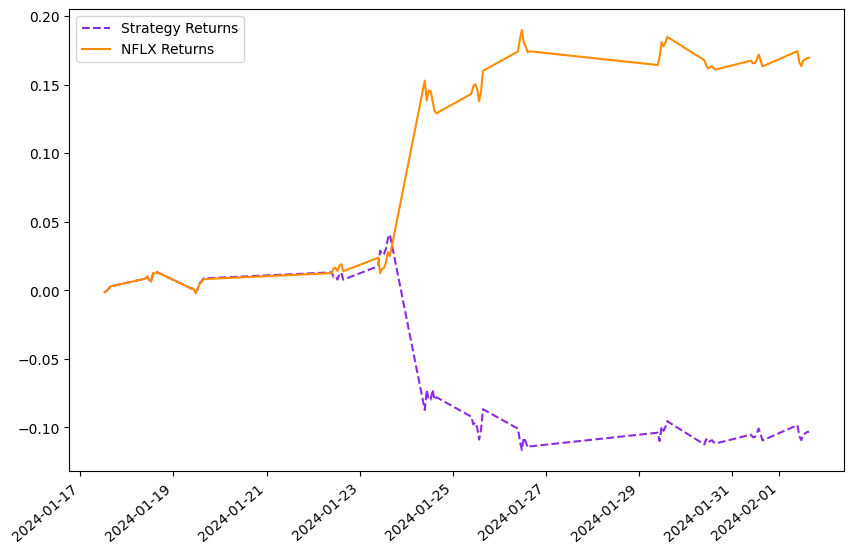

In [266]:
## Create Trading Strategy Using The Model
df2['Predicted_Signal'] = model2.predict(X2)
df2['NFLX_returns'] = np.log(df2['Close']/df2['Close'].shift(1))
Cumulative_NFLX_returns2 = np.cumsum(df2[split:]['NFLX_returns'])

df2['Strategy_returns'] = df2['NFLX_returns']* df2['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns2 = np.cumsum(df2[split:]['Strategy_returns'])

plt.figure(figsize=(10,6))
plt.plot(Cumulative_Strategy_returns2, color='blueviolet', label = 'Strategy Returns', linestyle='--')
plt.plot(Cumulative_NFLX_returns2, color='darkorange', label = 'NFLX Returns')
plt.xticks(rotation=40, ha='right')
plt.legend()
plt.show()

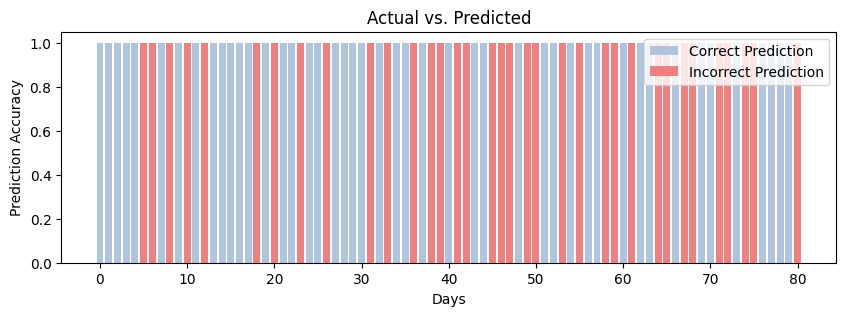

In [263]:
correct_predictions = (y2_test == predicted2)

# Plot actual vs. predicted values
plt.figure(figsize=(10, 3))
plt.bar(np.arange(len(y2_test)), correct_predictions, color='lightsteelblue', label='Correct Prediction')
plt.bar(np.arange(len(y2_test)), ~correct_predictions, color='lightcoral', label='Incorrect Prediction')
plt.title('Actual vs. Predicted')
plt.xlabel('Days')
plt.ylabel('Prediction Accuracy')
plt.legend()
plt.show()

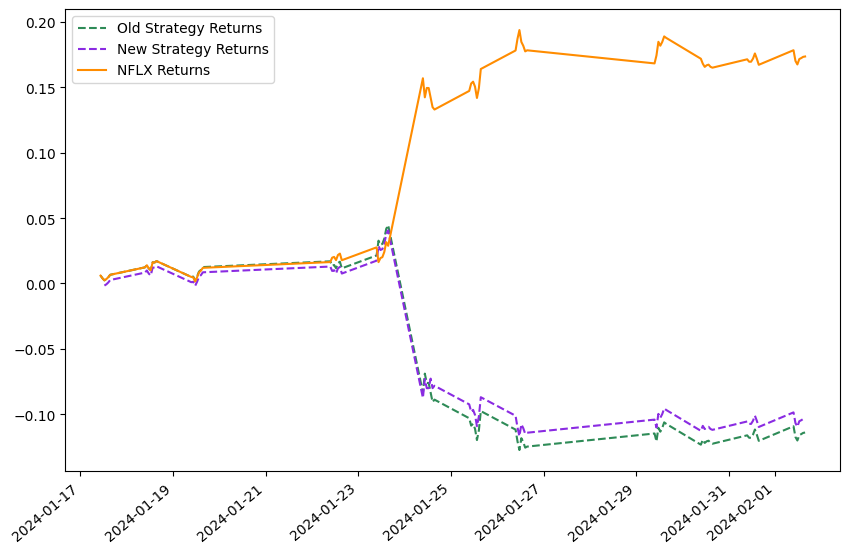

In [264]:
plt.figure(figsize=(10,6))
plt.plot(Cumulative_Strategy_returns, color='seagreen', linestyle='--', label = 'Old Strategy Returns')
plt.plot(Cumulative_Strategy_returns2, color='blueviolet', label = 'New Strategy Returns', linestyle='--')
plt.plot(Cumulative_NFLX_returns, color='darkorange', label = 'NFLX Returns')
plt.xticks(rotation=40, ha='right')
plt.legend()
plt.show()